## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics import r2_score

In [2]:
plt.style.use(['ggplot'])

# Dataset (MV)

In [3]:
data = pd.read_csv('AFLW2000_CSV.csv', sep = ',')

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0.000000,0.981430,3.177963,7.520325,16.636810,36.479370,62.062347,88.868835,110.733765,118.650955,...,102.307434,104.603790,105.392700,106.522430,105.473969,104.190979,102.097076,-0.068547,-0.854021,0.218333
1,0.000000,2.627716,8.086754,14.034782,24.569130,43.002541,65.318535,94.591743,129.564789,159.050568,...,124.945862,123.593628,123.707397,127.578278,132.781006,133.528320,133.139709,0.027256,-0.247779,-0.010263
2,0.000000,2.811073,8.599014,14.774353,24.622337,42.561806,64.624336,88.097191,116.038246,139.069031,...,124.044159,123.918488,124.202271,127.209229,130.290009,131.033295,129.797485,-0.167856,-0.361028,0.058591
3,9.189560,13.021408,19.371765,24.665512,31.373764,41.456253,50.984695,61.400986,85.168381,112.612656,...,129.959900,131.272278,131.317719,133.843475,145.569031,147.044464,143.419983,-0.373085,0.293578,-0.125011
4,0.000000,5.628967,13.232834,21.585968,34.941544,56.668945,82.074783,110.237274,139.773102,160.022217,...,110.728516,109.649475,109.133148,110.911469,111.923309,113.186951,113.483612,0.036318,-0.447323,-0.115917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,21.561691,25.811447,32.422134,38.263092,43.471085,47.248810,47.666733,52.505356,69.010727,92.375259,...,101.394165,101.891266,101.157593,99.480896,106.234344,107.861328,106.594971,-0.218161,0.493541,-0.201171
1996,65.364685,68.758057,73.024994,74.687347,73.470276,67.888962,58.108994,49.526123,55.484039,73.191803,...,104.679474,99.255981,94.589630,91.891541,97.009796,101.801483,106.304535,0.236384,0.983607,-0.383734
1997,4.427643,9.238068,17.643219,24.182190,29.904846,36.717194,43.515259,57.460648,85.145340,116.014679,...,121.408234,120.166931,119.589172,121.766174,126.348846,127.412476,128.160187,0.004142,0.229272,-0.080178
1998,22.984161,36.283844,51.948059,65.758560,79.150574,91.497543,101.220642,112.787872,133.944183,155.966736,...,130.242004,125.732666,121.596771,112.713654,119.805725,124.505981,128.966248,-0.075998,0.314266,-0.553940


In [5]:
y_shift = 68
xy_list = ["8", "30", "36", "45", "48", "54", str(8 + y_shift), str(30+ y_shift), str(36+ y_shift), str(45+ y_shift), str(48+ y_shift), str(54+ y_shift)]

In [6]:
X = data[xy_list]
X

,8,30,36,45,48,54,76,98,104,113,116,122
0,110.733765,146.752136,80.142059,140.495544,86.391693,123.938110,145.034058,74.306610,24.679947,40.945328,97.019775,106.712524
1,129.564789,140.174927,64.615181,180.717896,84.806679,170.367981,193.743530,81.283203,32.051865,32.081787,132.337891,127.974915
2,116.038246,142.144196,67.212593,176.694061,96.299858,152.233765,180.176880,86.108856,28.459381,29.039993,127.771698,127.655426
3,85.168381,55.394028,17.275620,119.774429,43.476471,97.372406,188.073120,94.296753,32.307373,30.996658,129.008453,134.696777
4,139.773102,147.351593,70.316437,166.958527,104.474243,162.905640,170.516754,72.461243,37.941528,27.481964,117.512512,111.276093
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,69.010727,36.081528,10.207520,92.818039,32.030991,79.597824,148.876587,75.106445,34.988556,25.574020,102.799438,100.000641
1996,55.484039,5.935760,16.391968,66.400604,29.438400,60.687805,143.499847,71.361221,73.371826,21.394913,120.155273,91.391754
1997,85.145340,70.766525,15.662567,139.502441,46.514862,116.206604,181.936951,84.752319,41.760574,29.820312,128.623596,121.583801
1998,133.944183,69.028397,18.789688,107.931747,77.790710,127.684052,168.751038,91.778015,78.701996,21.929184,143.130554,112.187378


In [14]:
#pitch, yaw, roll
p = data[["136"]].to_numpy()
y = data[["137"]].to_numpy()
r = data[["138"]].to_numpy()

In [15]:
X.shape

(2000, 12)

In [16]:
X.shape[0]

2000

In [17]:
X.shape[1]

12

## Cost Function

In [18]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = X.shape[0]
    # print("m: ",m)
    
    
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions-y))
    return cost

## 1. Batch/Vanilla GD (MV)

In [19]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100,epsilon = 10e-8,beta1 = 0.9,beta2=0.9):
    '''
    X    = X matrix with concatinated bias column of (1s) --> which is multiplied by (theta_0)
    y    = Vector of Y
    theta=Vector of thetas np.zeros((n,1))
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    
    # m = len(y)
    m = X.shape[0]
    n = X.shape[1]
    # print(X.shape)     # --> (13, 2)
    # print(theta.shape) # --> (2, 1)
    
    hyothesis_history = np.zeros((iterations, m))
    gradient_history = np.zeros((iterations, n))
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,n))
    cost = 0.0
    # Momentum
    V = np.zeros((n,1))
    M = np.zeros((n,1))
    M_cap, V_cap = np.zeros((n,1)), np.zeros((n,1))
    for it in range(iterations):
        theta_history[it,:] =theta.T             # --> (1, 2)
        prediction = np.dot(X,theta)                           # --> (13, 1) 
        hyothesis_history[it,:] =prediction.T 
        
        cost = cal_cost(theta,X,y).T
        cost_history[it]  = cost
        
        
        gradient = (1/m)*(X.T.dot((prediction - y)))  # --> (2, 1)
        gradient_history[it, :] = gradient.T 
        
        # Stopping Condition
        if(np.abs(np.subtract(gradient_history[it], gradient_history[it-1])) < 0.001).all() and (it > 2):
            print("Grdaient Stopping Condition..")
            break
        
        # Adam
        M = beta1*M + (1-beta1)*gradient
        V = beta2*V + (1 - beta2)*np.square(gradient)
        
        #Bias Correction
        M_cap = M/(1-beta1**(it+1))
        V_cap = V/(1-beta2**(it+1))
        
        theta = theta - (learning_rate*M_cap)/(np.sqrt(V_cap) + epsilon)
        
        
        # Stopping Condition
        if (np.abs(np.subtract(theta_history[it], theta_history[it-1])) < 0.001).all() and (it > 2):
            print("Theta Stopping Condition..")
            break
        
        if (np.abs(np.subtract(cost_history[it], cost_history[it-1])) < 0.001).all() and (it > 2):
            print("Cost Stopping Condition..")
            break
        print(it)
           
    return theta, cost_history, theta_history, hyothesis_history

## Hyperparameter Tuning

In [118]:
'''
lr     = learning rate (hyperparamater)
n_iter = number of iterations
'''

lr =0.00145 #0.01
n_iter = 1000
epsilon = 10e-8
beta1 = 0.5
beta2 = 0.7

In [119]:
'''
m      = number of obseravations/records
n      = number of features + bias(theta_0)
X_b    = X matrix with concatinated bias column of (1s) --> which is multiplied by (theta_0)

'''
#theta = np.random.randn(2,1)

m = X.shape[0]

n = X.shape[1] + 1 

# theta initialization with zeros of size n*1
theta = np.zeros((n,1))        # --> (2, 1)

# Concatinate the b (column of 1s) on X to be multiplied by theta_0
X_b = np.c_[np.ones((m,1)),X]
# print(X_b)
theta,cost_history,theta_history,hyothesis_history = gradient_descent(X_b,y,theta,lr,n_iter,epsilon,beta1,beta2)

for i in range(0, n):
    print('Theta{}:          {:0.3f},'.format(i, theta[i][0]))

# print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

#theta_history for plotting 
theta0 = theta_history[:,0]
theta1 = theta_history[:,1]
theta2 = theta_history[:,2]
theta3 = theta_history[:,3]

0
1
2
3
4
Theta Stopping Condition..
Theta0:          0.003,
Theta1:          -0.002,
Theta2:          -0.003,
Theta3:          -0.004,
Theta4:          -0.002,
Theta5:          -0.003,
Theta6:          -0.002,
Theta7:          0.003,
Theta8:          0.003,
Theta9:          0.003,
Theta10:          -0.001,
Theta11:          0.003,
Theta12:          0.003,
Final cost/MSE:  0.000


In [120]:
y_pred = np.dot(X_b, theta)
y_pred

array([[-0.77077675],
       [-0.59735421],
       [-0.60983414],
       ...,
       [ 0.2378451 ],
       [ 0.15501555],
       [ 0.16102639]])

## R2 score

In [121]:
r2score = r2_score(y, y_pred, sample_weight=None, multioutput='uniform_average')
r2score

0.721888920676397

## Plotting

#### Plot loss vs. epochs

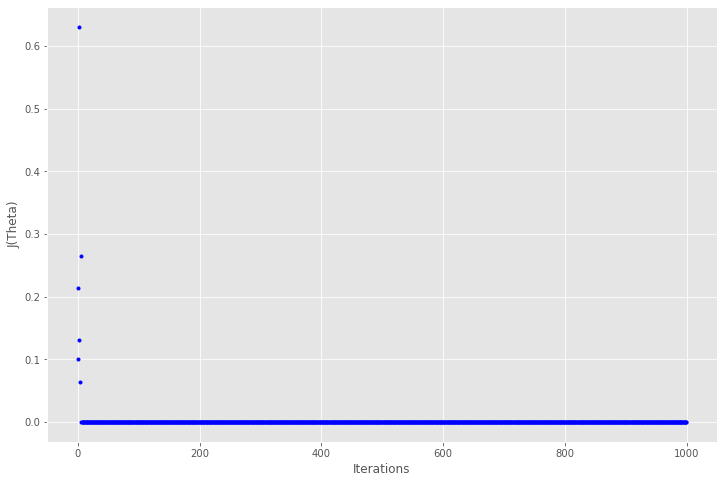

In [122]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
# _=ax.plot(range(n_iter),cost_history,'b.')
_=ax.plot(cost_history,'b.')

#### Plot Theta_0 vs. loss

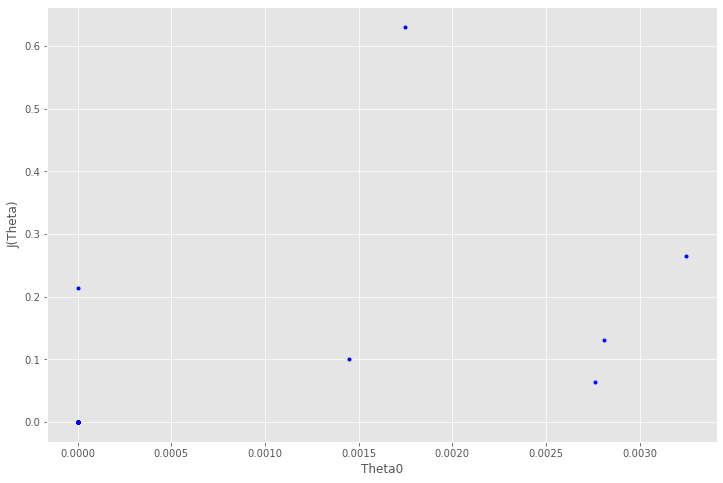

In [123]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta0,cost_history,'b.')

#### Plot Theta_1 vs. loss

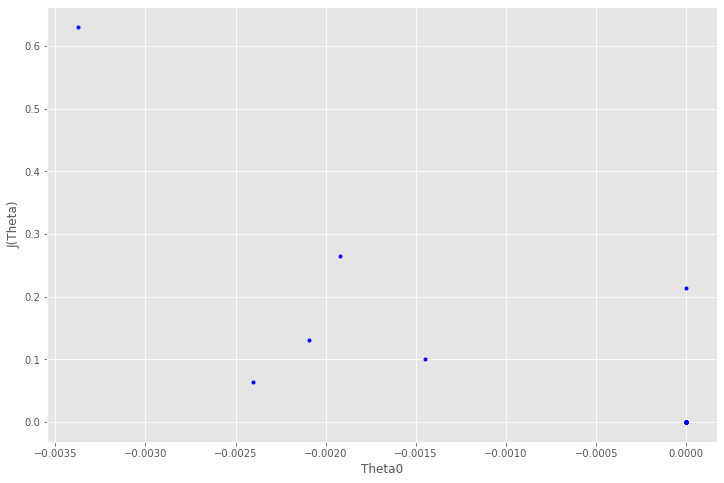

In [124]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta1,cost_history,'b.')

#### Plot Theta_2 vs. loss

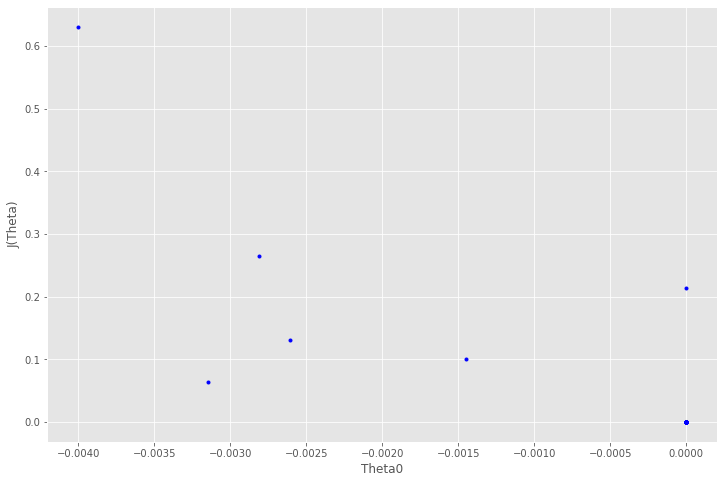

In [125]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta2,cost_history,'b.')

#### Plot Theta_3 vs. loss

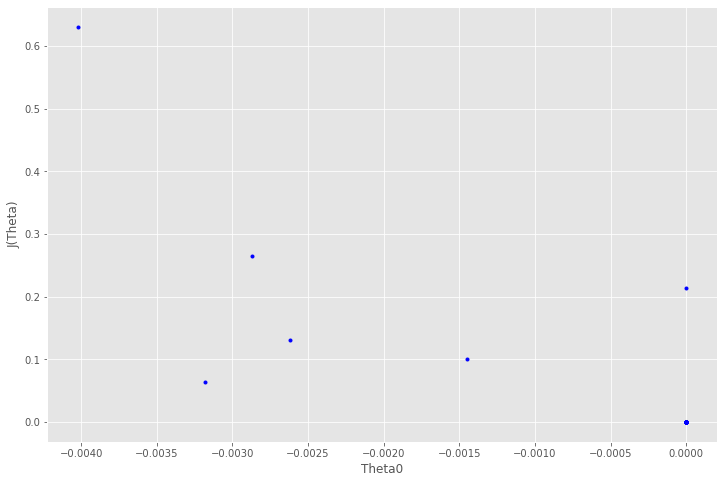

In [126]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta3,cost_history,'b.')

## 2. Mini-Batch Adam (MV)

In [536]:
#Shuffle
indices = np.random.permutation(m)
X = X[indices]
y = y[indices]
#Shuffle

def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =15, epsilon = 10e-8,beta1=0.5,beta2=0.7):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    
    m = X.shape[0]
    #print("m: ",m)
    n = X.shape[1] + 1
    # print(n)
    
    # n_batches = math.ceil(m/batch_size)
    n_batches = int(m/batch_size)
    cost_history_by_batch = np.zeros(iterations*n_batches)
    theta_history_by_batch = np.zeros((iterations*n_batches,n))
    by_batch_count = 0
    
    
    
    hyothesis_history = np.zeros((iterations, m))
    gradient_history = np.zeros((iterations, n))
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,n))

#     print("hyothesis_history: " ,hyothesis_history.shape)
#     print("cost_history: " ,cost_history.shape)
#     print("theta_history: " ,theta_history.shape)
    
    
    cost = 0.0
    # Momentum
    V = np.zeros((n,1))
    M = np.zeros((n,1))
    M_cap, V_cap = np.zeros((n,1)), np.zeros((n,1))
    
    for it in range(0, iterations):
        
        hypothesis_list = np.array([])
        theta_history[it,:] =theta.T
        
        sizer = 0
        counter = n_batches
        for i in range(0,m,batch_size):
            # print(i)
            # print("batch: ", batch_size)
            #print(counter)
            if(counter == 0):
                break
            theta_history_by_batch[by_batch_count, :] = theta.T

            # print("i: ", i)
            sizer = m-(i+batch_size)
            # print("sizer: ", sizer)
            if(sizer > batch_size):
                X_i = X[i:i+batch_size]
                X_i = np.c_[np.ones(len(X_i)),X_i]
                y_i = y[i:i+batch_size]
            if(sizer < batch_size and sizer > 0):
                X_i = X[i:m]
                X_i = np.c_[np.ones(len(X_i)),X_i]
                y_i = y[i:m]              
            #print("X_i length: ", len(X_i))
            #X_i = np.c_[np.ones(len(X_i)),X_i]
            #print(X_i)

            prediction = np.dot(X_i,theta)
            # print("prediction", prediction.shape)
            hypothesis_list = np.append(hypothesis_list, prediction) 
#             print("hypothesis_list: ", hypothesis_list)
#             print("hypothesis_list size: ", len(hypothesis_list))

            cost = cal_cost(theta,X_i,y_i).T
            cost_history_by_batch[by_batch_count] = cost
            #print("cost: ", cost)
            # counter ++
            by_batch_count = by_batch_count + 1

            gradient = (1/batch_size)*(X_i.T.dot((prediction - y_i)))   # --> (4, 1)
#             print("gradient shape: ",gradient.shape)
#             print("gradient: ",gradient)

            # Adam
            M = beta1*M + (1-beta1)*gradient
            V = beta2*V + (1 - beta2)*np.square(gradient)

            #Bias Correction
            M_cap = M/(1-beta1**(it+1))
            V_cap = V/(1-beta2**(it+1))

            theta = theta - (learning_rate*M_cap)/(np.sqrt(V_cap) + epsilon)
            #print("theta:", theta)
            counter = counter - 1


        gradient_history[it, :] = gradient.T 
        hyothesis_history[it, :] = hypothesis_list 
        # cost_history[it]  = cal_cost(theta,X_i,y_i).T
        cost_history[it]  = cost

        # Stopping Conditions
        if(np.abs(np.subtract(gradient_history[it], gradient_history[it-1])) < 0.001).all():
            print("Grdaient Stopping Condition..")
            break
#         if (np.abs(np.subtract(theta_history[it], theta_history[it-1])) < 0.001).all():
#             print("Theta Stopping Condition..")
#             break
        if (np.abs(np.subtract(cost_history[it], cost_history[it-1])) < 0.001).all():
            print("Cost Stopping Condition..")
            break

        # theta_history[it+1,:] =theta.T 
        
    return theta, cost_history, theta_history, hyothesis_history, theta_history_by_batch, cost_history_by_batch

## Hyperparameter Tuning

In [537]:
# '''
# lr     = learning rate (hyperparamater)
# n_iter = number of iterations
# '''

# lr = 0.3 #0.1
# n_iter = 1000 #200
# batch_size =5
# epsilon = 10e-8
# beta1 = 0.9
# beta2 = 0.9



In [538]:
'''
lr     = learning rate (hyperparamater)
n_iter = number of iterations
'''

lr = 0.01    #0.22 #0.1
n_iter = 1000 #200
batch_size =8
epsilon = 10e-8
beta1 = 0.5
beta2 = 0.7

In [539]:
'''
m      = number of obseravations/records
n      = number of features + bias(theta_0)
X_b    = X matrix with concatinated bias column of (1s) --> which is multiplied by (theta_0)

'''
#theta = np.random.randn(2,1)

m = X.shape[0]
n = X.shape[1] + 1 

# theta initialization with zeros of size n*1
theta = np.zeros((n,1))        # --> (2, 1)

# Concatinate the b (column of 1s) on X to be multiplied by theta_0
X_b = np.c_[np.ones((m,1)),X]
# print(X_b)
theta,cost_history,theta_history,hyothesis_history,theta_history_by_batch,cost_history_by_batch = minibatch_gradient_descent(X,y,theta,lr,n_iter,batch_size,epsilon,beta1,beta2)

for i in range(0, n):
    print('Theta{}:          {:0.3f},'.format(i, theta[i][0]))

#print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

#theta_history for plotting 
theta0 = theta_history[:,0]
theta1 = theta_history[:,1]
theta2 = theta_history[:,2]
theta3 = theta_history[:,3]

theta0_by_batch = theta_history_by_batch[:,0]
theta1_by_batch = theta_history_by_batch[:,1]
theta2_by_batch = theta_history_by_batch[:,2]
theta3_by_batch = theta_history_by_batch[:,3]

Cost Stopping Condition..
Theta0:          0.051,
Theta1:          0.380,
Theta2:          0.530,
Theta3:          1.112,
Final cost/MSE:  0.000


In [540]:
y_pred = np.dot(X_b, theta)
y_pred

array([[152.11707752],
       [105.75786564],
       [182.22941937],
       [185.49529007],
       [199.72376668],
       [151.91471766],
       [191.51125994],
       [189.36220953],
       [175.20448939],
       [165.06856212],
       [177.93084534],
       [159.3480322 ],
       [176.9177472 ],
       [153.6883492 ],
       [145.09581236],
       [151.15513066],
       [181.99551343],
       [168.24570464],
       [175.10585167],
       [144.58512527],
       [143.42590297],
       [186.982918  ],
       [114.34165323],
       [140.64744934],
       [153.6325867 ]])

### R2 Score

In [541]:
r2score = r2_score(y, y_pred, sample_weight=None, multioutput='uniform_average')
r2score

0.9879735948033945

## Plotting

### 1. Plot loss vs. epochs

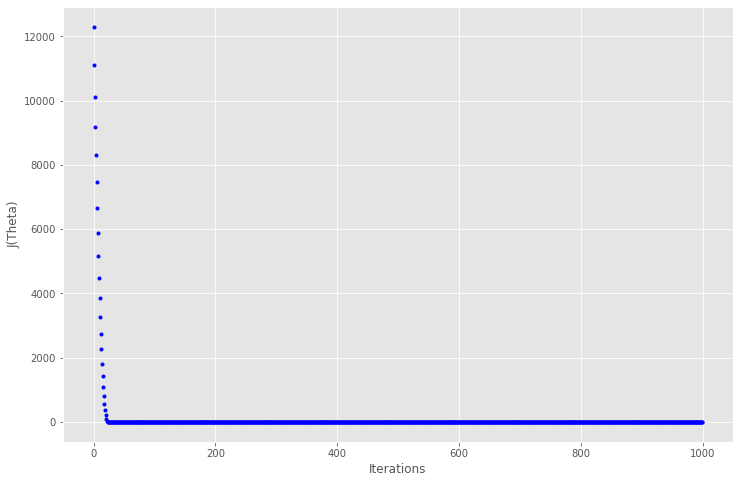

In [522]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

#### Plot Theta_0 vs. loss

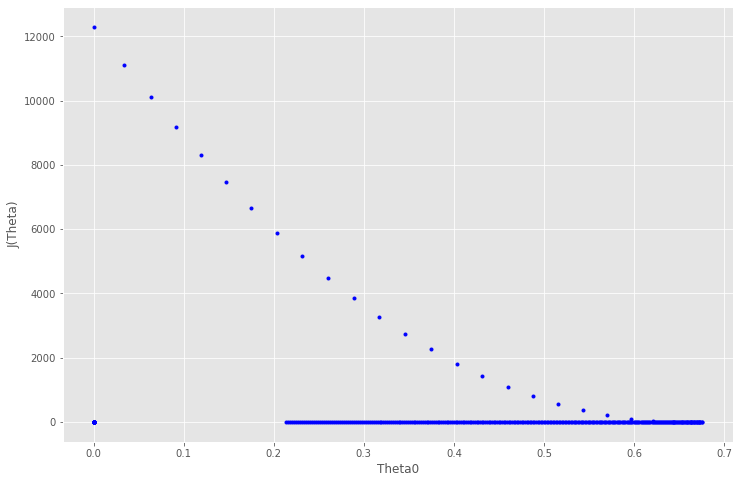

In [523]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta0,cost_history,'b.')

#### Plot Theta_1 vs. loss

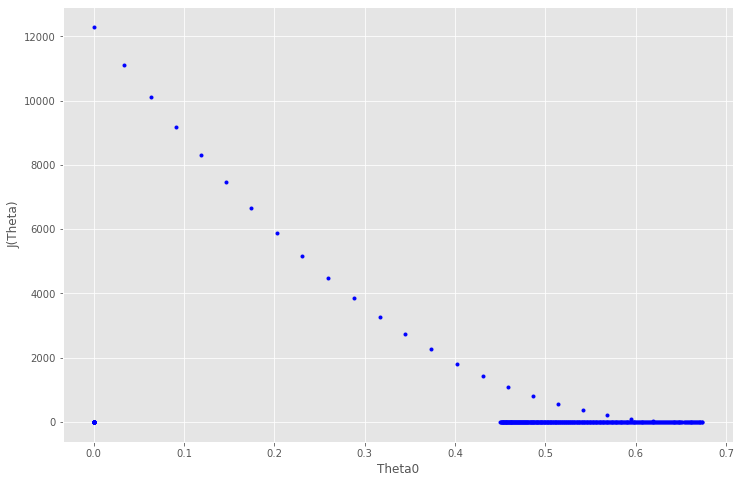

In [524]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta1,cost_history,'b.')

#### Plot Theta_2 vs. loss

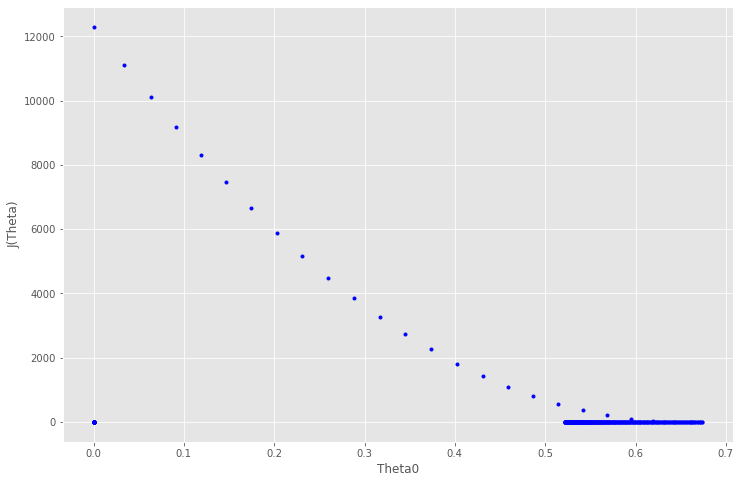

In [525]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta2,cost_history,'b.')

#### Plot Theta_3 vs. loss

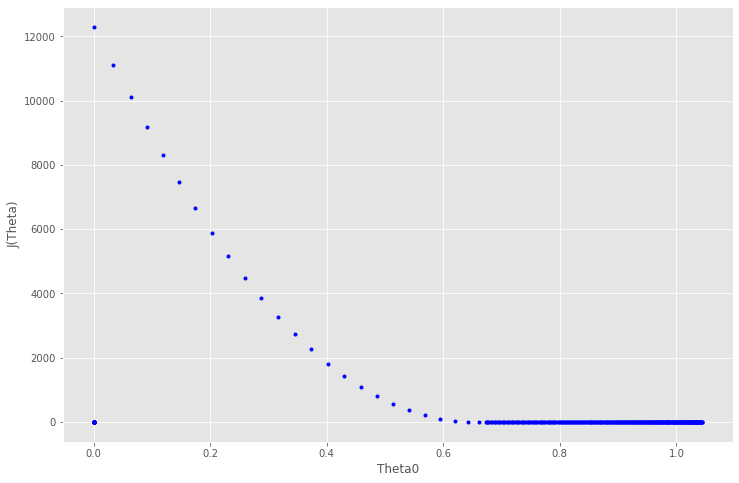

In [526]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta3,cost_history,'b.')

### 2. Plot loss vs. Iterations

In [527]:
# number of batches
n_batches = math.ceil(m/batch_size) 

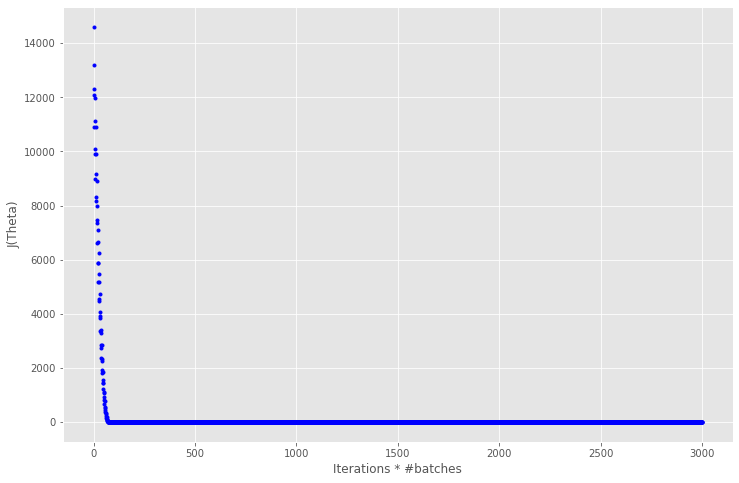

In [529]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations * #batches')
_=ax.plot(cost_history_by_batch,'b.')

#### Plot Theta_0 vs. loss

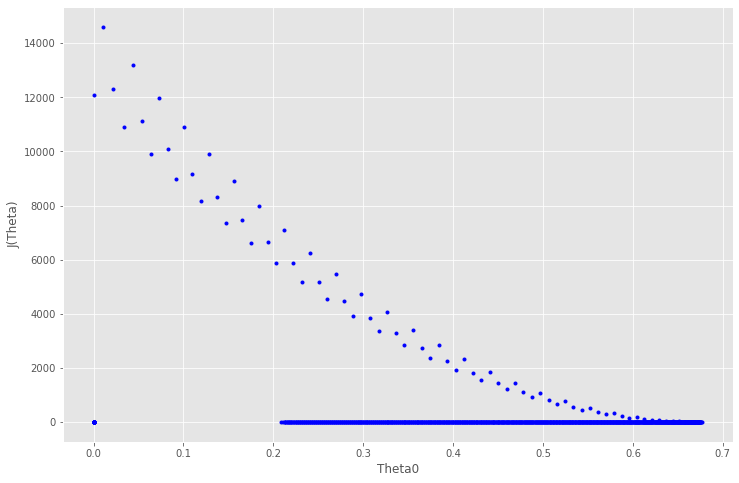

In [532]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta0')
_=ax.plot(theta0_by_batch,cost_history_by_batch,'b.')

#### Plot Theta_1 vs. loss

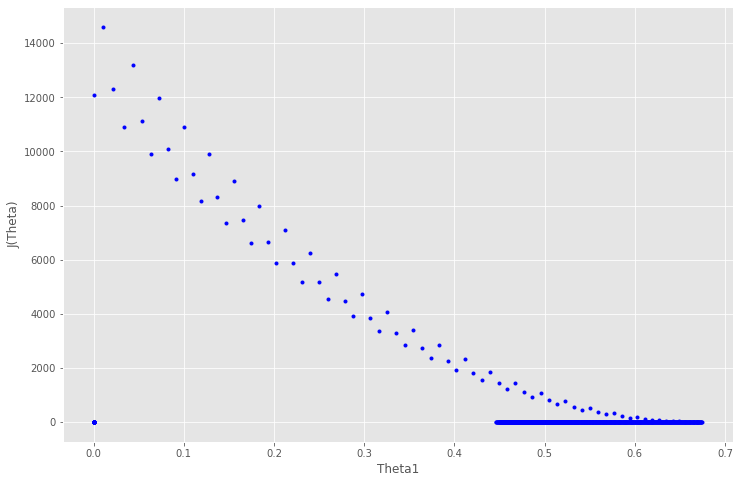

In [533]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta1')
_=ax.plot(theta1_by_batch,cost_history_by_batch,'b.')

#### Plot Theta_2 vs. loss

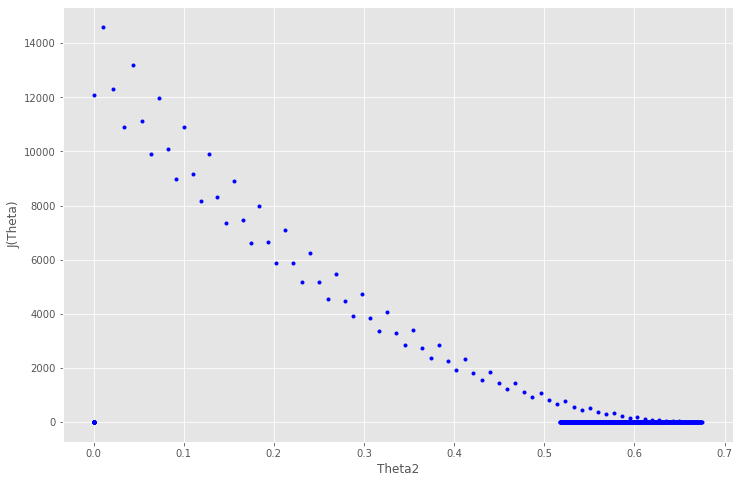

In [534]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta2')
_=ax.plot(theta2_by_batch,cost_history_by_batch,'b.')

#### Plot Theta_3 vs. loss

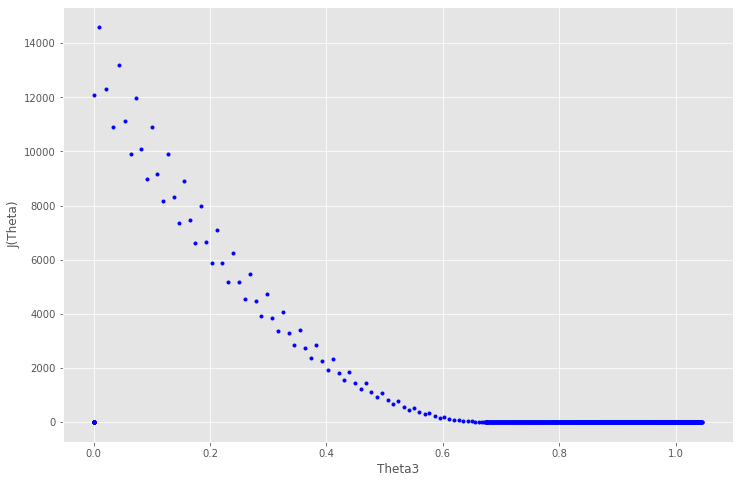

In [535]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Theta3')
_=ax.plot(theta3_by_batch,cost_history_by_batch,'b.')